In [1]:
import sys
sys.path.insert(0, '/Users/kedzie/Documents/Berkeley/notebooks/utilities')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections.abc import Iterable

from utility_functions.utils import * #read_data, read_press, getnearpos, folder_files, headspace
from matplotlib import rcParams as rc
from matplotlib.ticker import FormatStrFormatter
rc['mathtext.default'] = 'regular'
rc['font.family'] = 'sans-serif'
rc['font.sans-serif'] = ['Verdana']

In [26]:
def plot_cycling(disch, chrg, press, channel, cyclenum, n=None, offset=0, eline=False):
    i=cyclenum
    colors=['#001933','#003366', '#0066CC', '#3399FF', '#99CCFF']
    n=1
    disc_i= np.mean(disch['I/mA']) #/(np.pi*0.6**2)
    chrg_i= np.mean(chrg['I/mA']) #/(np.pi*0.6**2)
    print('discharge current: ' + str(disc_i))
    print('charge current: ' + str(chrg_i))
    
    #find the final capacity reached on discharge in mAh
    cap=disch['Capacity/mA.h'].iloc[-1]

    x1=disch['Capacity/mA.h'] #/(np.pi*0.6**2)
    y1=disch['Ewe/V']
    x2=(cap-chrg['Capacity/mA.h']) #/(np.pi*0.6**2)
    y2=chrg['Ewe/V']
    
    if i==3:
        end_ch = 154
    elif i ==2:
        end_ch = 153
    else:
        end_ch = -1

    ax.plot(x1, y1, c=colors[i], linestyle='-', linewidth=2.5, label = str(i))
    ax.plot([x1.iloc[-1], x2.iloc[5] ], [ y1.iloc[-1], y2.iloc[5] ], c=colors[i], linestyle='-', linewidth=2.5, label='')
    ax.plot(x2[:end_ch], y2[:end_ch], c=colors[i], linestyle='-', label='', linewidth=2.5)
    ax.plot([0.01,cap],[2.27,2.27], c='#A0A0A0', linestyle=(0,(1,4)), linewidth=2)
    
    st1=disch['time/s'].iloc[0]
    end1=disch['time/s'].iloc[-1]
    
    st2=chrg['time/s'].iloc[0]
    end2=chrg['time/s'].iloc[-1]
    
    #determine start and end indices in pressure df for discharge and charge
    st_p1 = getnearpos(press['time/s'],st1)
    end_p1 = getnearpos(press['time/s'],end1)
    
    st_p2 = getnearpos(press['time/s'],st2)
    end_p2 = getnearpos(press['time/s'],end2)
    
    temp = press['temperature/C']+273
    umoles = press['pressure/torr']/760*headspace(channel)/temp/0.082057
    umoles = umoles-umoles.iloc[st_p1]
    elec_oxy= x1.iloc[-1]*3.6/96485/umoles[end_p1]
    
    disch_cap=(press['time/s']-press['time/s'].iloc[st_p1])*-disc_i/3600
    char_cap=cap-(press['time/s']-press['time/s'].iloc[st_p2])*chrg_i/3600 #divide cap by/(np.pi*.6**2)

    gap= umoles[end_p1]-umoles[st_p2]

    x=[0,cap] #/(np.pi*0.6**2)]
    y=[0-offset,-cap*3.6/n/96485*10**6-offset]
    
    if cyclenum == 3:
        end_index = 10
    else:
        end_index = 0
    ax2.plot(disch_cap[st_p1:end_p1], (umoles)[st_p1:end_p1]+offset, 'o-', color= colors[i], linewidth=1.5, markersize=6, label='', markevery = 0.008)
    ax2.plot(char_cap[st_p2:(end_p2+2-end_index)], (umoles)[st_p2:(end_p2+2-end_index)]+gap+offset, 'o-', color=colors[i], linewidth=1.5, markersize=6, markevery=0.014, mfc='white', label='')
    if eline==True:
        ax2.plot(x, y,  c='xkcd:grey', linestyle=(0,(4,2)), label= '',linewidth= 2.4) 

    print("o2 consumed: " + str(umoles[st_p1]-(umoles[end_p1+1] )))
    print("o2 evolved: " + str(umoles[end_p2]-(umoles[st_p2+1] )))
    print((umoles[end_p2-1]-(umoles[st_p2]))/(umoles[st_p1]-(umoles[end_p1+1])))
    epermol = chrg['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p2-1]-(umoles[st_p2+1]))
    epermold = disch['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(disch['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(chrg['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((chrg['time/s'].iloc[-1]- chrg['time/s'].iloc[0])/3600))
    ax.tick_params(axis='both', which='major', labelsize=18); ax2.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24, labelpad = 14 ); ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad = 0); plt.tight_layout()
    ax.set_ylim([0.95,5])
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))


    #ax.set_xlim()
    return ( umoles[end_p2-end_index]+gap )

discharge current: -0.4998931118014706
charge current: 0.500067841431579
o2 consumed: 37.27683074380114
o2 evolved: 34.57769512559868
0.9240141434949064
e- per mol on charge: 1.086069243623163
e- per mol on discharge: 1.0007632172563035
discharge capacity: 0.999833345413208
charge capacity: 1.000157925817702
charge time (h) : 1.999999975785621
discharge current: -0.49986450702127655
charge current: 0.500040478558952
o2 consumed: 7.084925854521543
o2 evolved: 6.689408383911527
0.9312056414679463
e- per mol on charge: 1.430629029112416
e- per mol on discharge: 1.3148420248202002
discharge capacity: 0.2496698995431264
charge capacity: 0.2500408391157786
charge time (h) : 0.4999999921268764
discharge current: -0.49983759224806207
charge current: 0.5000753902280131
o2 consumed: 8.110889296157481
o2 evolved: 8.642973573439505
1.0505730519924092
e- per mol on charge: 1.5613031826838872
e- per mol on discharge: 1.2651681810698823
discharge capacity: 0.2750261790222592
charge capacity: 0.358535

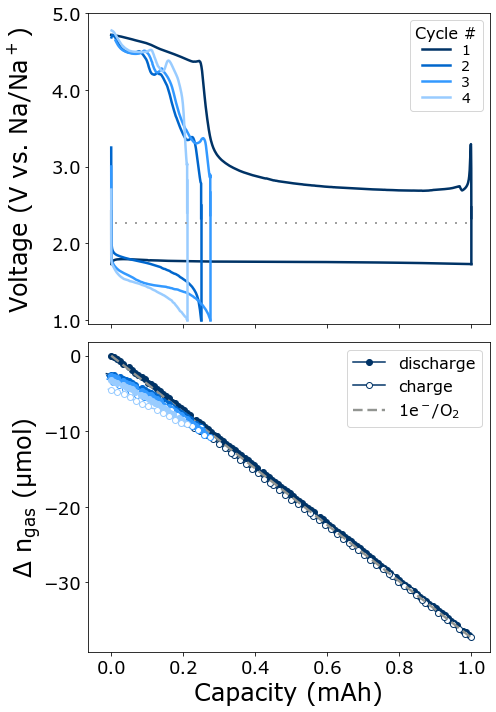

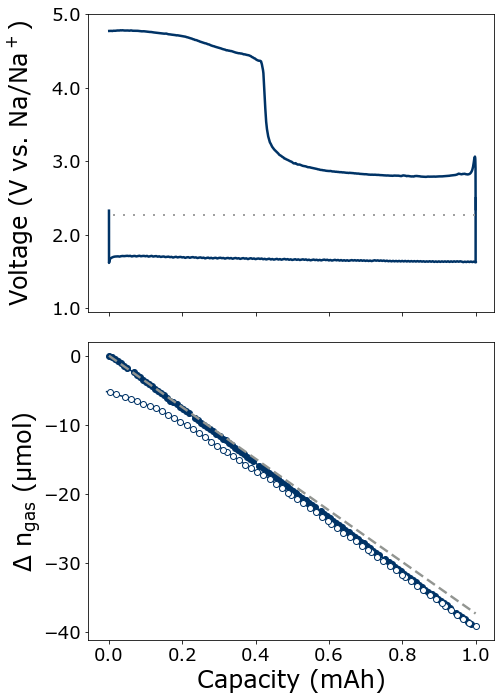

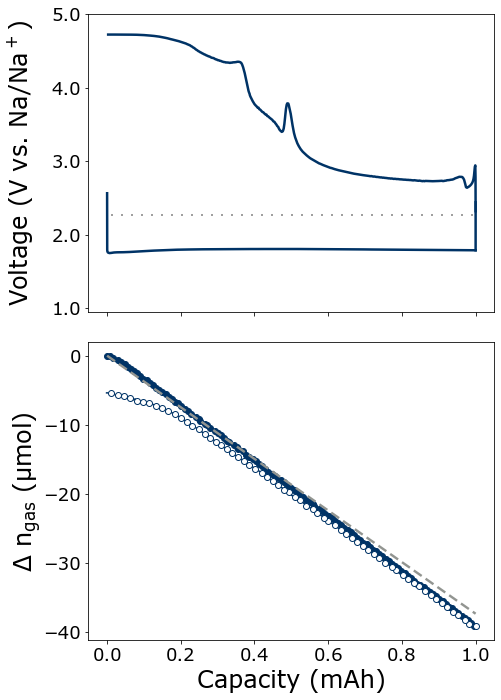

In [28]:
# cp1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/200708_Na_MCMB0203_cycling_CP_cycle1_Ch1__2020-07-08_11.54_22.txt')
# cp2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/200708_Na_MCMB0203_cycling_CP_cycle2_Ch1__2020-07-08_17.36_25.txt')

# cp_fold= folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/')

# fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

# plot_cycling(cp_fold[1], cp_fold[3], cp1, 1, 1, eline = True)
# plot_cycling(cp_fold[6], cp_fold[8], cp2, 1, 2)


newfold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/')
newcp1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/200716_Na_MCMB0709_cycling_CP_cell1_cy1_Ch4__2020-07-16_15.31_27.txt')
newcp2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/200716_Na_MCMB0709_cycling_CP_cell1_cy2_Ch4__2020-07-16_20.27_05.txt')
newcp3 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/200716_Na_MCMB0709_cycling_CP_cell1_cy3_Ch4__2020-07-16_22.21_20.txt')
newcp4 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/200716_Na_MCMB0709_cycling_CP_cell1_cy4_Ch4__2020-07-17_07.09_04.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

off1 = plot_cycling(newfold[1], newfold[3], newcp1, 4, 1, eline = True)
off2 = plot_cycling(newfold[6], newfold[8], newcp2, 4, 2, offset = off1 )
off3 = plot_cycling(newfold[11], newfold[13], newcp3, 4, 3, offset = off1 +off2)
off4 = plot_cycling(newfold[16], newfold[18], newcp4, 4, 4, offset = off1 +off2+off3)

leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)

#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200716_Na_MCMB0709_cycling_CP/200716_Na_MCMB0709_cycling_CP_cell1.pdf', transparent= True, dpi=800, bbox_inches='tight')
print(str(1*3.6/1/96485*10**6) + 'umoles')



january = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/200114_10%binder_MCMB1202_cycling_CP_cycle1_Ch4__2020-01-14_17.58_33.txt')
janfold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

off1 = plot_cycling(janfold[1], janfold[3], january, 4, 1, eline = True)
plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200114_10%binder_MCMB1202_cycling_CP/200114 MCMB CP cycling.png', transparent= True, dpi=800, bbox_inches='tight')




recentCP = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/')
recentCPpress = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200708_Na_MCMB0203_cycling_CP/200708_Na_MCMB0203_cycling_CP_cycle1_Ch1__2020-07-08_11.54_22.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

on1 = plot_cycling(recentCP[1], recentCP[3], recentCPpress, 1, 1, eline = True)



In [17]:
def plot_CA_cycles(discharge, cp1, cp2, ca, press, ch, cyclenum=1, leg=None, offset=0, n=1):
    
    i_dis = -1*np.mean( discharge['I/mA'] ) #calculate discharge and charge current (mA)
    i_ch = np.mean(cp1['I/mA'])
    print('charge current (mA): ' + str(i_ch))
    cp2['Capacity/mA.h'] = cp2['Capacity/mA.h'] + cp1['Capacity/mA.h'].iloc[-1]
    ca['Capacity/mA.h'] = ca['Capacity/mA.h'] + cp2['Capacity/mA.h'].iloc[-1]   
    umoles = press['pressure/torr']/760*headspace(ch)/(press['temperature/C']+273)/0.082057
    umoles = umoles-umoles.iloc[0]
    col = ['#003366', '#0066CC', '#3399FF', '#99CCFF']
    
    cap = []; curr = []
    files_ec = pd.concat([discharge, cp1, cp2, ca], sort=True) 
    
    for i in range(len(umoles)):
        dex = getnearpos( files_ec['time/s'], press['time/s'].iloc[i] )
        cap.append( files_ec['Capacity/mA.h'].iloc[dex] )
        curr.append( files_ec['I/mA'].iloc[dex] )

    umolesdf = pd.DataFrame( press['time/s'], columns=['time/s'] )
    umolesdf['umoles'] = umoles
    umolesdf['Capacity/mA.h'] = cap
    umolesdf['I/mA'] = curr
    
    st1= discharge['time/s'].iloc[0]
    end1= discharge['time/s'].iloc[-1]
    st2=cp1['time/s'].iloc[0]
    end2=cp1['time/s'].iloc[-1]
    st3=cp2['time/s'].iloc[0]
    end3=cp2['time/s'].iloc[-1]
    st4=ca['time/s'].iloc[0]
    end4=ca['time/s'].iloc[-1]
    end_cap = [discharge['Capacity/mA.h'].iloc[-1], cp1['Capacity/mA.h'].iloc[-1], cp2['Capacity/mA.h'].iloc[-1], ca['Capacity/mA.h'].iloc[-1]]

    ax.plot((discharge['Capacity/mA.h']), discharge['Ewe/V'], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label = cyclenum )
    ax.plot([end_cap[0], end_cap[0]-cp1['Capacity/mA.h'].iloc[5] ], [discharge['Ewe/V'].iloc[-1], cp1['Ewe/V'].iloc[5] ], c=col[cyclenum-1], linestyle='-', linewidth=2.5, label='') #this line just connects the discharge to charge lines
    ax.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['Ewe/V'], color=col[cyclenum-1], label='', linewidth=2.5)
    ax.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['Ewe/V'], color=col[cyclenum-1] , label='', linewidth=2.5)
    ax.plot(end_cap[0]- ca['Capacity/mA.h'], ca['Ewe/V'], color= col[cyclenum-1], linewidth=2.5, label='') 
    ax.plot([0.01, 1.0],[2.27,2.27], c='grey', linestyle=(0,(1,5)), linewidth=2.5, label='')
#     ax3.plot(end_cap[0]-cp1['Capacity/mA.h'], cp1['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-cp2['Capacity/mA.h'], cp2['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)
#     ax3.plot(end_cap[0]-ca['Capacity/mA.h'], ca['I/mA'], color = '#EE7733', linestyle='--', linewidth=2.5)

    st_p1 = getnearpos(press['time/s'],st1) #find time at beginning of discharge
    end_p1 = getnearpos(press['time/s'],end1) #find time at end of discharge
    
    st_p2 = getnearpos(press['time/s'],st2) #start of charge cp1
    end_p2 = getnearpos(press['time/s'],end2)
    
    st_p3 = getnearpos(press['time/s'],st3)
    end_p3 = getnearpos(press['time/s'],end3)
    
    st_p4 = getnearpos(press['time/s'],st4)
    end_p4 = getnearpos(press['time/s'],end4) #end of charge chronoamperometry
    
    umolesdf['umoles'] = umolesdf['umoles']-umolesdf['umoles'].iloc[st_p1]
    
    x=[0, end_cap[0]]
    y=[0+offset,-end_cap[0]*3.6/n/96485*10**6+offset]
    orr = -umolesdf['umoles'].iloc[end_p1]+umoles.iloc[st_p1]
    oer = umoles.iloc[end_p4]-umoles.iloc[st_p2]
    print('total moles of gas consumed: ' + str(orr))
    print('total moles of gas evolved: ' + str(oer))
    
    epermol = ca['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[end_p4-1]-(umoles[st_p2+1]))
    epermold = discharge['Capacity/mA.h'].iloc[-1] * 3.6 / 96485 *10**6 / (umoles[st_p1]-(umoles[end_p1+1]))
    
    print("e- per mol on charge: " + str(epermol))
    print("e- per mol on discharge: " + str(epermold))
    print('discharge capacity: ' + str(discharge['Capacity/mA.h'].iloc[-1]))
    print('charge capacity: ' + str(ca['Capacity/mA.h'].iloc[-1]))
    print('charge time (h) : ' + str((ca['time/s'].iloc[-1]- cp1['time/s'].iloc[0])/3600))
    print('charge cap= ' + str( ca['Capacity/mA.h'].iloc[-1] ) )
    print('oer/orr: ' + str( oer/orr ))
    print('final current= ' + str(ca['I/mA'].iloc[-1]))
    pressure_gap=umoles.iloc[end_p1]-umoles.iloc[st_p2]
    

    ax2.plot(umolesdf['Capacity/mA.h'][st_p1:end_p1+1], umolesdf['umoles'][st_p1:end_p1+1]+offset,  'o-', color= col[cyclenum-1], linewidth=1.5, markersize=6, label='')#, markevery=(0.0,0.02))
    ax2.plot(end_cap[0]-umolesdf['Capacity/mA.h'][st_p2:end_p4-1], (umolesdf['umoles'])[st_p2:end_p4-1]+pressure_gap+offset,  'o-', color=col[cyclenum-1], linewidth=1.5, markersize=6, mfc='white', markevery=(0.0,0.013), label='')
    
    if cyclenum == 1:
        ax2.plot(x,y, color='#606060', linestyle='--', label= '',linewidth= 2)
    
    ax.set_ylabel('Voltage (V vs. Na/Na$^+$)', fontsize=24, labelpad = 14 )
    ax2.set_ylabel('$\Delta$ n$_{gas}$ ($\mu$mol)', fontsize=24, labelpad=0)
    ax2.set_xlabel('Capacity (mAh)', fontsize=24)
    #ax3.set_ylabel('Current (mA))', fontsize=24, color='#EE7733' )
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax2.tick_params(axis='both', which='major', labelsize=18)
    #ax3.tick_params(axis='both', which='major', labelsize=18)
    ax.set_ylim([0.98,5])
    ax.set_xlim([-0.04,1.04])
    if n==2:
        ax.set_ylim([2.5,4])
        ax.set_ylabel('Voltage (V vs. Li/Li$^+$)')
    plt.tight_layout()
    return ( umolesdf['umoles'][end_p4-1]+pressure_gap )



charge current (mA): 0.4999699797560975
total moles of gas consumed: 37.09749640084796
total moles of gas evolved: 35.24511967358225
e- per mol on charge: 1.0278664863876827
e- per mol on discharge: 1.0000493679821887
discharge capacity: 0.9998228814866807
charge capacity: 0.9692702090574636
charge time (h) : 5.927403317124677
charge cap= 0.9692702090574636
oer/orr: 0.9500673385812805
final current= 0.0050298235999999994
charge current (mA): 0.4999186766666666
total moles of gas consumed: 37.03900466029603
total moles of gas evolved: 34.51946207224974
e- per mol on charge: 1.055060995053136
e- per mol on discharge: 1.002192485269353
discharge capacity: 0.9997995694478352
charge capacity: 0.9716668911278247
charge time (h) : 7.2045432024582015
charge cap= 0.9716668911278247
oer/orr: 0.9319759639559884
final current= 0.0050768931
charge current (mA): 0.49989709189189174
total moles of gas consumed: 37.12644175678369
total moles of gas evolved: 33.80423530944286
e- per mol on charge: 2.74

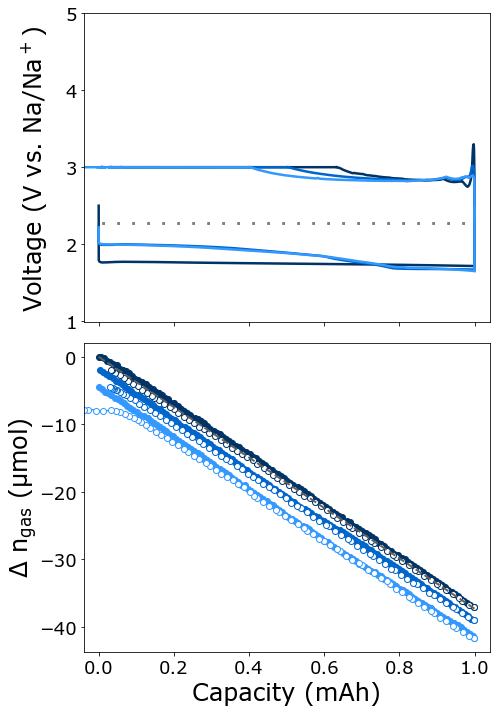

In [31]:
ca1 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell1/200714_Na_MCMB0629_cycling_CA_cell1_cy1_Ch3__2020-07-14_11.57_58.txt')
cafold1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell1/')
ca2= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell1/200714_Na_MCMB0629_cycling_CA_cell1_cy2_Ch3__2020-07-14_20.51_47.txt')
ca3=read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell1/200714_Na_MCMB0629_cycling_CA_cell1_cy3_Ch3__2020-07-15_09.50_57.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
of1 = plot_CA_cycles(cafold1[1], cafold1[3], cafold1[4], cafold1[5], ca1, 3, 1)
of2 = plot_CA_cycles(cafold1[8], cafold1[10], cafold1[11], cafold1[12], ca2, 3, 2, offset=of1)
of3 = plot_CA_cycles(cafold1[15], cafold1[17], cafold1[18], cafold1[19], ca3, 3, 3, offset=of1+of2)





charge current (mA): 0.500010455063291
total moles of gas consumed: 37.72592427218757
total moles of gas evolved: 35.24782506350171
e- per mol on charge: 1.0397281679081336
e- per mol on discharge: 1.0073934969901823
discharge capacity: 0.9998465908898247
charge capacity: 0.978565603080723
charge time (h) : 4.856255496759938
charge cap= 0.978565603080723
oer/orr: 0.934313094867956
final current= 0.0050582243


-1.5103799240766165

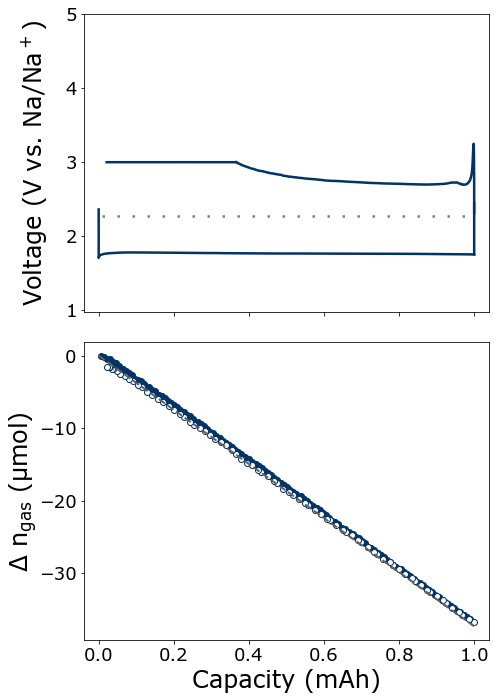

In [30]:
ca2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell2/200714_Na_MCMB0629_cycling_CA_cell2_cy1_Ch4__2020-07-14_11.53_00.txt')
cafold = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200714_Na_MCMB0629_cycling_CA_cell2/')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10)) 
plot_CA_cycles(cafold[1], cafold[3], cafold[4], cafold[5], ca2, 4, 1 )


charge current (mA): 0.4999948531343283
total moles of gas consumed: 39.18221131986971
total moles of gas evolved: 37.36419359964508
e- per mol on charge: 0.9712901874797452
e- per mol on discharge: 0.9438104054892467
discharge capacity: 0.9998692406548394
charge capacity: 0.9731029781202475
charge time (h) : 4.557910833705374
charge cap= 0.9731029781202475
oer/orr: 0.9536009413715072
final current= 0.0050257812
charge current (mA): 0.49997135000000004
total moles of gas consumed: 39.80631349168057
total moles of gas evolved: 38.11242899171705
e- per mol on charge: 0.988158138377094
e- per mol on discharge: 0.9296095860797513
discharge capacity: 0.999819106525845
charge capacity: 1.006464920938015
charge time (h) : 4.794210164177802
charge cap= 1.006464920938015
oer/orr: 0.9574468381675802
final current= 0.0050359596
charge current (mA): 0.4999694002083333
total moles of gas consumed: 39.9578642666843
total moles of gas evolved: 38.11284071847403
e- per mol on charge: 0.989792829980076

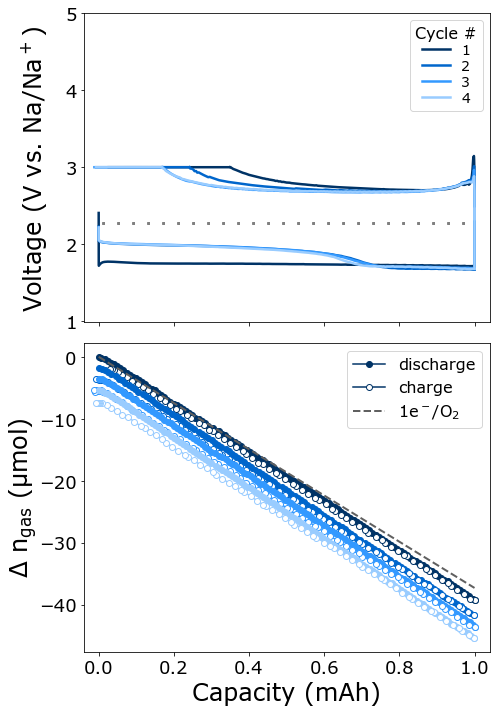

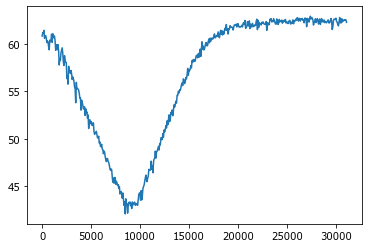

In [11]:
goodca2 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/')
cap21 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/200717_MCMB0709_cycling_CA_cell2_cycle1_Ch4__2020-07-17_14.55_18.txt')
cap22 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/200717_MCMB0709_cycling_CA_cell2_cycle2_Ch4__2020-07-17_23.36_57.txt')
cap23 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/200717_MCMB0709_cycling_CA_cell2_cycle3_Ch4__2020-07-18_12.14_59.txt')
cap24 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/200717_MCMB0709_cycling_CA_cell2_cycle4_Ch4__2020-07-18_21.25_30.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

off1 = plot_CA_cycles(goodca2[1], goodca2[3], goodca2[4], goodca2[5], cap21, 4, 1)
off2 = plot_CA_cycles(goodca2[8], goodca2[10], goodca2[11], goodca2[12], cap22, 4, 2, offset = off1)
off3 = plot_CA_cycles(goodca2[15], goodca2[17], goodca2[18], goodca2[19], cap23, 4, 3, offset = off1+off2)
off4 = plot_CA_cycles(goodca2[22], goodca2[24], goodca2[25], goodca2[26], cap24, 4, 4, offset = off1+off2+off3)



leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell2/200717_MCMB0709_cycling_CA_cell2.pdf', transparent= True, dpi=800, bbox_inches='tight')



plt.figure()
plt.plot(cap21['time/s'], cap21['pressure/torr']/cap21['temperature/C'])



charge current (mA): 0.49986075405063285
total moles of gas consumed: 38.426054572337264
total moles of gas evolved: 36.995429198486846
e- per mol on charge: 0.9862803695802618
e- per mol on discharge: 0.9634400445742808
discharge capacity: 1.000111632876926
charge capacity: 0.9746500311626328
charge time (h) : 4.995185272855659
charge cap= 0.9746500311626328
oer/orr: 0.9627693920239129
final current= 0.0050268709
charge current (mA): 0.4998356946551724
total moles of gas consumed: 39.48443731487974
total moles of gas evolved: 37.710737304065674
e- per mol on charge: 0.9999645035589979
e- per mol on discharge: 0.9376037133422207
discharge capacity: 1.000088188383314
charge capacity: 1.0096823858718078
charge time (h) : 4.9211531070853125
charge cap= 1.0096823858718078
oer/orr: 0.9550785035463669
final current= 0.0050567634999999994
charge current (mA): 0.49982276185185176
total moles of gas consumed: 39.49825337447659
total moles of gas evolved: 37.82266645540969
e- per mol on charge: 

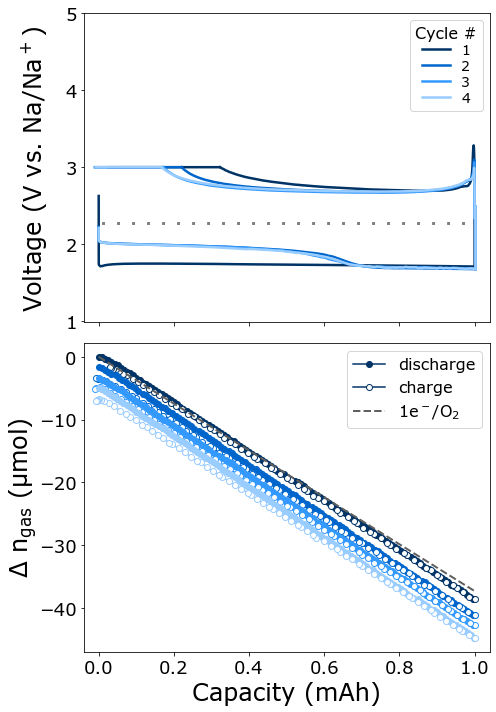

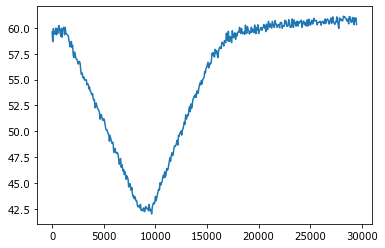

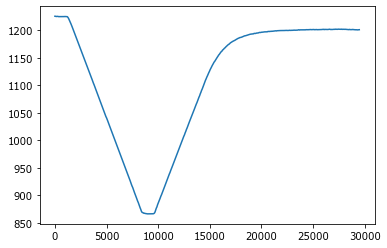

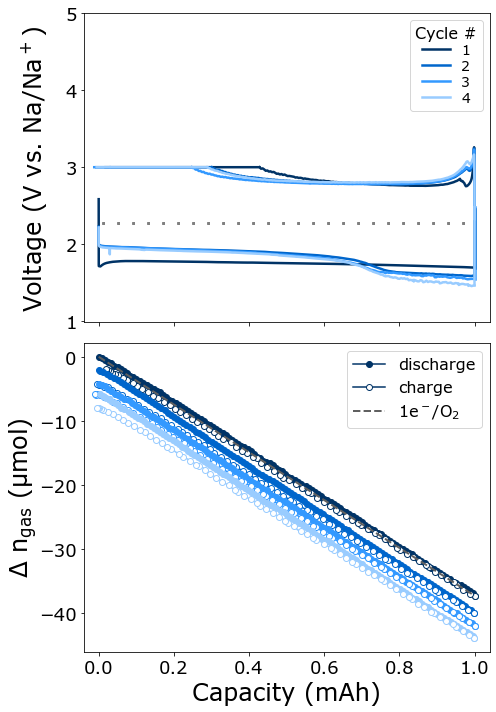

In [21]:
goodca1 = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/')
cap11 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/200717_MCMB0709_cycling_CA_cell1_cycle1_Ch1__2020-07-17_15.23_04.txt')
cap12 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/200717_MCMB0709_cycling_CA_cell1_cycle2_Ch1__2020-07-17_23.36_45.txt')
cap13 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/200717_MCMB0709_cycling_CA_cell1_cycle3_Ch1__2020-07-18_12.14_51.txt')
cap14 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/200717_MCMB0709_cycling_CA_cell1_cycle4_Ch1__2020-07-18_21.25_38.txt')

fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

off1 = plot_CA_cycles(goodca1[1], goodca1[3], goodca1[4], goodca1[5], cap11, 1, 1)
off2 = plot_CA_cycles(goodca1[8], goodca1[10], goodca1[11], goodca1[12], cap12, 1, 2, offset = off1)
off3 = plot_CA_cycles(goodca1[15], goodca1[17], goodca1[18], goodca1[19], cap13, 1, 3, offset = off1+off2)
off4 = plot_CA_cycles(goodca1[22], goodca1[24], goodca1[25], goodca1[26], cap14, 1, 4, offset = off1+off2+off3)



leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200717_MCMB0709_cycling_CA_cell1/200717_MCMB0709_cycling_CA_cell1.pdf', transparent= True, dpi=800, bbox_inches='tight')



plt.figure()
plt.plot(cap11['time/s'], cap11['pressure/torr']/cap11['temperature/C'])
plt.figure()
plt.plot(cap11['time/s'], cap11['pressure/torr'])

anotherna = folder_files('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/')
nap1= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/200722_Na_CA_MCMB0709_cycling_cycle1_Ch4__2020-07-22_14.25_56.txt')
nap2 = read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/200722_Na_CA_MCMB0709_cycling_cycle2_Ch4__2020-07-22_22.31_01.txt')
nap3= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/200722_Na_CA_MCMB0709_cycling_cycle3_Ch4__2020-07-23_09.12_21.txt')
nap4= read_press('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/200722_Na_CA_MCMB0709_cycling_cycle4_Ch4__2020-07-23_17.28_36.txt')
fig, (ax, ax2)= plt.subplots(2, sharex=True, figsize= (7,10))

print('actual cycle')
off1 = plot_CA_cycles(anotherna[1], anotherna[3], anotherna[4], anotherna[5], nap1, 4, 1)
off2 = plot_CA_cycles(anotherna[8], anotherna[10], anotherna[11], anotherna[12], nap2, 4, 2, offset = off1)
off3 = plot_CA_cycles(anotherna[15], anotherna[17], anotherna[18], anotherna[19], nap3, 4, 3, offset = off1+off2)
off4 = plot_CA_cycles(anotherna[21], anotherna[23], anotherna[24], anotherna[25], nap4, 4, 4, offset = off1+off2+off3)



leg = ax.legend(fontsize=14, loc='upper right', labelspacing=0.15)
leg.set_title('Cycle #',prop={'size':16})
ax2.legend(labels=['discharge', 'charge', '1e$^-/O_2$'], fontsize=16)
#plt.savefig('/Users/kedzie/Documents/Berkeley/Research/Data/2020/200722_Na_CA_MCMB0709_cycling/200722_Na_CA_MCMB0709_cycling.pdf', transparent= True, dpi=800, bbox_inches='tight')

